In [1]:
import matplotlib.pyplot as plt
from math import exp
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [2]:
df_train = pd.read_csv('kc_house_data_train.csv', index_col = 0)

In [3]:
df_train['second_sale'] = [1 if x == True else 0 for x in df_train.duplicated(subset='id', keep='last')]
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0
17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0
17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0
17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0


In [4]:
def date_time(df):
    df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
    df['date'] = df['date'].apply(lambda x: x.value)

In [5]:
date_time(df_train)

In [6]:
# date values are seconds since Jan 1st, 1970 - let's convert to months since 
# Jan 1st, 2010 instead.

avg_days_per_month = 365.25/12

init = pd.to_datetime('1970-01-01 00:00:00')
twenty_ten = pd.to_datetime('2010-01-01 00:00:00')

forty_years = twenty_ten - init
forty_years.value / (60*60*24*(10**9))

14610.0

In [7]:
df_train['months_since_2010'] = (df_train['date'] - forty_years.value)/(avg_days_per_month*60*60*24*(10**9))

In [8]:
df_train['months_since_2010']

0        57.133470
1        55.622177
2        55.425051
3        62.915811
4        54.373717
           ...    
17285    61.995893
17286    52.566735
17287    52.369610
17288    59.071869
17289    60.484600
Name: months_since_2010, Length: 17290, dtype: float64

In [9]:
df_train.corr()['price']

id                  -0.015644
date                -0.008652
price                1.000000
bedrooms             0.305106
bathrooms            0.524335
sqft_living          0.703540
sqft_lot             0.086803
floors               0.256985
waterfront           0.275779
view                 0.395485
condition            0.036099
grade                0.666215
sqft_above           0.607760
sqft_basement        0.323312
yr_built             0.056450
yr_renovated         0.117770
zipcode             -0.048958
lat                  0.302394
long                 0.019327
sqft_living15        0.585567
sqft_lot15           0.081423
second_sale         -0.028629
months_since_2010   -0.008652
Name: price, dtype: float64

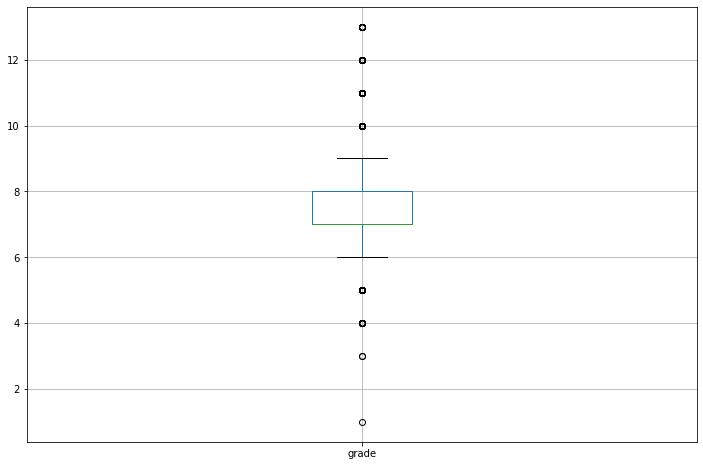

In [10]:
boxplot = df_train.boxplot(column=['grade'], figsize = (12,8))

In [11]:
len(df_train['zipcode'].unique())

70

In [12]:
df_train.sort_values('bedrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010
8597,2402100895,1403654400000000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0,53.749487
2356,1773100755,1408579200000000000,520000.0,11,3.00,3000,4960,2.0,0,0,3,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,0,55.622177
11181,627300145,1407974400000000000,1148000.0,10,5.25,4590,10920,1.0,0,2,3,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,0,55.392197
3680,8812401450,1419811200000000000,660000.0,10,3.00,2920,3745,2.0,0,0,4,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,0,59.893224
17114,5566100170,1414540800000000000,650000.0,10,2.00,3610,11914,2.0,0,0,4,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,0,57.889117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,2310060040,1411603200000000000,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,0,56.772074
13989,6896300380,1412208000000000000,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,0,57.002053
15733,7849202299,1424217600000000000,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,0,61.568789
483,3374500520,1430265600000000000,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0,63.868583


In [13]:
df_train['bedrooms'][8597] = 3

In [14]:
df_train['bdrms_squared'] = df_train['bedrooms'] ** 2



In [15]:
df_train['sale_year'] = pd.DatetimeIndex(df_train['date']).year

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17290 non-null  int64  
 1   date               17290 non-null  int64  
 2   price              17290 non-null  float64
 3   bedrooms           17290 non-null  int64  
 4   bathrooms          17290 non-null  float64
 5   sqft_living        17290 non-null  int64  
 6   sqft_lot           17290 non-null  int64  
 7   floors             17290 non-null  float64
 8   waterfront         17290 non-null  int64  
 9   view               17290 non-null  int64  
 10  condition          17290 non-null  int64  
 11  grade              17290 non-null  int64  
 12  sqft_above         17290 non-null  int64  
 13  sqft_basement      17290 non-null  int64  
 14  yr_built           17290 non-null  int64  
 15  yr_renovated       17290 non-null  int64  
 16  zipcode            172

In [16]:

x = df_train['yr_renovated']
y = df_train['sale_year']
z = df_train['yr_built']
condlist = [x == 0, x != 0]
choicelist = [y-z, y-x]
df_train['years_since_reno'] = np.select(condlist, choicelist)

In [17]:
x = df_train['yr_renovated']
condlist = [x >= 2012, x < 2012]
choicelist = [1, 0]
df_train['recent_reno'] = np.select(condlist, choicelist)

In [18]:
from statsmodels.formula.api import ols

lr_model = ols(formula='price~yr_built+view+bedrooms+sqft_living+grade+waterfront', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     5267.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:08   Log-Likelihood:            -2.3738e+05
No. Observations:               17290   AIC:                         4.748e+05
Df Residuals:                   17283   BIC:                         4.748e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.751e+06   1.24e+05     46.415      0.000    5.51e+06    5.99e+06
yr_built    -3304.0936     65.513    -50.434      0.000   -3432.506   -3175.681
view         4.505e+04   2518.268     17.890      0.000    4.01e+04       5e+04
bedrooms    -3.481e+04   2334.785    -14.909      0.000   -3.94e+04   -3.02e+04
sqft_living   195.6291      3.365     58.144      0.000     189.034     202.224
grade        1.302e+05   2398.729     54.265      0.000    1.25e+05    1.35e+05
waterfront   5.895e+05   2.08e+04     28.327      0.000    5.49e+05     6.3e+05
==============================================================================
Omnibus:                    13268.148   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1007961.238
Skew:                           3.092   Prob(JB):                         0.00
Kurtosis:                      39.890   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
zips_by_price = df_train.groupby('zipcode').mean()['price'].to_frame()
zips_by_price = zips_by_price.sort_values('price').reset_index().reset_index()

In [20]:
zips_by_price['index'] = zips_by_price['index'] + 1


<AxesSubplot:xlabel='mod_index', ylabel='price'>

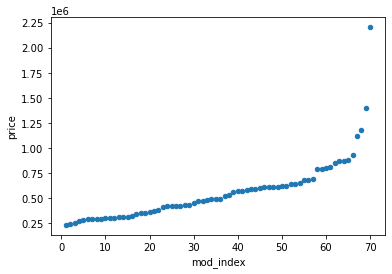

In [21]:
zips_by_price['mod_index'] = (zips_by_price['index'])
zips_by_price.plot.scatter('mod_index', 'price')

In [22]:
df_train['zips_by_price'] = df_train['zipcode']

In [23]:
zips_by_mean_price_dict = dict(zip(zips_by_price['zipcode'], zips_by_price['index']))

In [24]:
df_train['zips_by_price'] = df_train['zipcode']
df_train['zips_by_price'].replace(zips_by_mean_price_dict, inplace = True)

In [25]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21


In [26]:
df_train.corr()['price']

id                  -0.015644
date                -0.008652
price                1.000000
bedrooms             0.313775
bathrooms            0.524335
sqft_living          0.703540
sqft_lot             0.086803
floors               0.256985
waterfront           0.275779
view                 0.395485
condition            0.036099
grade                0.666215
sqft_above           0.607760
sqft_basement        0.323312
yr_built             0.056450
yr_renovated         0.117770
zipcode             -0.048958
lat                  0.302394
long                 0.019327
sqft_living15        0.585567
sqft_lot15           0.081423
second_sale         -0.028629
months_since_2010   -0.008652
bdrms_squared        0.308328
sale_year           -0.002334
years_since_reno    -0.104828
recent_reno          0.023070
zips_by_price        0.567784
Name: price, dtype: float64

In [27]:
from statsmodels.formula.api import ols

lr_model = ols(formula='price~zips_by_price', data=df_train).fit()


In [28]:
df_train['distance_from_space_needle'] = np.sqrt((47.6205 - df_train['lat']) ** 2 + (122.3493 - df_train['long']) ** 2)

In [29]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18,244.511368
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47,244.634307
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62,244.478306
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37,244.577313
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53,244.432304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52,244.461302
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63,244.637305
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31,244.611342
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21,244.339382


In [30]:
lr_model = ols(formula='price~yr_built+view+bedrooms+sqft_living+grade+waterfront+recent_reno+zips_by_price+distance_from_space_needle', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     5601.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:10   Log-Likelihood:            -2.3456e+05
No. Observations:               17290   AIC:                         4.691e+05
Df Residuals:                   17280   BIC:                         4.692e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.288e+07   2.85e+06    -22.080      0.000   -6.85e+07   -5.73e+07
yr_built                   -1613.2203     62.238    -25.920      0.000   -1735.213   -1491.228
view                        4.621e+04   2148.648     21.507      0.000     4.2e+04    5.04e+04
bedrooms                   -3.017e+04   1986.440    -15.187      0.000   -3.41e+04   -2.63e+04
sqft_living                  205.5206      2.896     70.977      0.000     199.845     211.196
grade                       6.883e+04   2174.214     31.659      0.000    6.46e+04    7.31e+04
waterfront                  6.188e+05   1.77e+04     34.975      0.000    5.84e+05    6.54e+05
recent_reno                 2.886e+04   1.72e+04      1.676      0.094   -4886.093    6.26e+04
zips_by_price               6861.4082     85.268     80.469      0.000    6694.274    7028.542
distance_from_space_needle  2.678e+05   1.15e+04     23.380      0.000    2.45e+05     2.9e+05
==============================================================================
Omnibus:                    17509.685   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3239169.324
Skew:                           4.590   Prob(JB):                         0.00
Kurtosis:                      69.423   Cond. No.                     5.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_above', ylabel='sqft_living'>

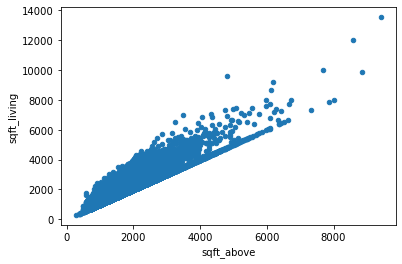

In [31]:
df_train.plot.scatter('sqft_above', 'sqft_living')

In [32]:
#next you should scale it to get a sense of the size of the coefficients? 

In [33]:
df_price = pd.read_csv('KC_zips_price.csv')

In [34]:
zips_by_mean_price_dict_ext = dict(zip(df_price['Zip'], df_price['Rank']))

In [35]:
df_train['zips_by_price_ext'] = df_train['zipcode']
df_train['zips_by_price_ext'].replace(zips_by_mean_price_dict_ext, inplace = True)

In [36]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext
0,2591820310,1412553600000000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18,244.511368,98058
1,7974200820,1408579200000000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47,244.634307,18
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62,244.478306,6
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37,244.577313,47
4,9510861140,1405296000000000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53,244.432304,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52,244.461302,21
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63,244.637305,9
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31,244.611342,36
17288,122069107,1417651200000000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,0,59.071869,9,2014,43,0,21,244.339382,98038


In [37]:
x = df_train['zips_by_price_ext']
condlist = [x > 50, x <51]
choicelist = [51, x]
df_train['zips_by_price_ext_tidy'] = np.select(condlist, choicelist)

In [38]:
lr_model = ols(formula='price~yr_built+bedrooms+sqft_living+grade+waterfront+zips_by_price_ext_tidy+distance_from_space_needle', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     6459.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:12   Log-Likelihood:            -2.3525e+05
No. Observations:               17290   AIC:                         4.705e+05
Df Residuals:                   17282   BIC:                         4.706e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -5.051e+07   2.93e+06    -17.219      0.000   -5.63e+07   -4.48e+07
yr_built                   -2003.0016     63.665    -31.462      0.000   -2127.792   -1878.212
bedrooms                   -3.261e+04   2061.678    -15.819      0.000   -3.67e+04   -2.86e+04
sqft_living                  213.9039      2.974     71.914      0.000     208.074     219.734
grade                       7.956e+04   2244.529     35.445      0.000    7.52e+04     8.4e+04
waterfront                    7.8e+05    1.7e+04     45.784      0.000    7.47e+05    8.13e+05
zips_by_price_ext_tidy     -6745.9873     95.201    -70.860      0.000   -6932.591   -6559.383
distance_from_space_needle  2.219e+05   1.18e+04     18.809      0.000    1.99e+05    2.45e+05
==============================================================================
Omnibus:                    16495.730   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2465875.808
Skew:                           4.197   Prob(JB):                         0.00
Kurtosis:                      60.900   Cond. No.                     5.81e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
df_train.corr()['price']

id                           -0.015644
date                         -0.008652
price                         1.000000
bedrooms                      0.313775
bathrooms                     0.524335
sqft_living                   0.703540
sqft_lot                      0.086803
floors                        0.256985
waterfront                    0.275779
view                          0.395485
condition                     0.036099
grade                         0.666215
sqft_above                    0.607760
sqft_basement                 0.323312
yr_built                      0.056450
yr_renovated                  0.117770
zipcode                      -0.048958
lat                           0.302394
long                          0.019327
sqft_living15                 0.585567
sqft_lot15                    0.081423
second_sale                  -0.028629
months_since_2010            -0.008652
bdrms_squared                 0.308328
sale_year                    -0.002334
years_since_reno         

<AxesSubplot:xlabel='zips_by_price_ext_tidy', ylabel='price'>

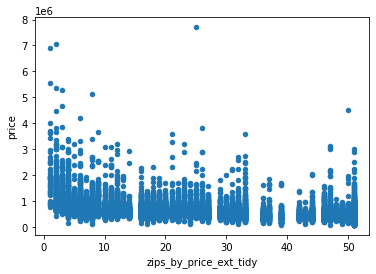

In [40]:
df_train.plot.scatter('zips_by_price_ext_tidy', 'price')

In [41]:
df_train['price'].max()

7700000.0

In [42]:
df_train.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext,zips_by_price_ext_tidy
10366,6762700020,1413158400000000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,0,57.363450,36,2014,27,0,66,244.672300,25,25
6903,9808700762,1402444800000000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,0,53.289528,25,2014,13,0,69,244.563302,2,2
7519,9208900037,1411084800000000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,0,56.574949,36,2014,13,0,70,244.589300,1,1
2232,2470100110,1407110400000000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,0,55.063655,25,2014,13,0,70,244.582300,1,1
1979,8907500070,1428883200000000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,0,63.342916,25,2015,6,0,69,244.569300,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,1623049041,1399507200000000000,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570,0,52.172485,4,2014,63,0,2,244.645340,98168,51
15956,3883800011,1415145600000000000,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,0,58.119097,9,2014,60,0,20,244.690330,98146,51
9193,8658300340,1400803200000000000,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,0,52.665298,1,2014,102,0,30,244.258302,39,39
4869,40000362,1399334400000000000,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387,0,52.106776,4,2014,72,0,2,244.629344,98168,51


In [43]:
df_train['zips_by_price_ext_tidy_power'] = df_train['zips_by_price_ext_tidy'] ** -.316

In [44]:
lr_model = ols(formula='price~sqft_living+grade+waterfront+zips_by_price_ext_tidy+zips_by_price_ext_tidy_power', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     8199.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:13   Log-Likelihood:            -2.3586e+05
No. Observations:               17290   AIC:                         4.717e+05
Df Residuals:                   17284   BIC:                         4.718e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -4.701e+05   2.06e+04    -22.810      0.000   -5.11e+05    -4.3e+05
sqft_living                    177.6570      2.620     67.804      0.000     172.521     182.793
grade                          5.27e+04   2107.291     25.009      0.000    4.86e+04    5.68e+04
waterfront                    8.689e+05   1.75e+04     49.666      0.000    8.35e+05    9.03e+05
zips_by_price_ext_tidy       -2783.5975    182.571    -15.247      0.000   -3141.456   -2425.739
zips_by_price_ext_tidy_power  8.964e+05   2.85e+04     31.492      0.000    8.41e+05    9.52e+05
==============================================================================
Omnibus:                    16311.035   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2454360.947
Skew:                           4.111   Prob(JB):                         0.00
Kurtosis:                      60.786   Cond. No.                     4.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
zip_indexing_NICHE = pd.read_csv("zip_indexing_NICHE.csv")

In [46]:
zip_indexing_NICHE

,Zip,NICHE ranking
0,98004,1
1,98055,2
2,98052,3
3,98109,5
4,98007,6
5,98122,7
6,98029,8
7,98102,9
8,98103,10
9,98006,11


In [47]:
zips_by_NICHErank_dict = dict(zip(zip_indexing_NICHE['Zip'], zip_indexing_NICHE['NICHE ranking']))

In [48]:
df_train['zips_by_liv_qual'] = df_train['zipcode']
df_train['zips_by_liv_qual'].replace(zips_by_NICHErank_dict, inplace = True)
df_train['zips_by_liv_qual'].replace({98005: 13, 98022: 51, 26:1}, inplace = True)


In [49]:
df_train['zips_by_liv_qual'].sort_values()

2232      1
3195      1
7519      1
1328      1
13220     1
         ..
4266     70
7096     70
1082     70
16670    70
13603    70
Name: zips_by_liv_qual, Length: 17290, dtype: int64

In [50]:
x = df_train['sqft_lot']

condlist = [x >= 10000, x < 10000]
choicelist = [x - np.sqrt(x), x]
df_train['sqft_lot'] = np.select(condlist, choicelist)

In [51]:
#df_train['sqft_living_2'] = df_train['sqft_living'] ** 2
#df_train['sqft_living_3'] = df_train['sqft_living'] ** 3 
#df_train['sqft_living_4'] = df_train['sqft_living'] ** 4
#df_train['sqft_living_5'] = df_train['sqft_living'] ** 5
#df_train['sqft_living_6'] = df_train['sqft_living'] ** 6

In [52]:
x = df_train['sqft_living']

condlist = [x >= 6000, x < 6000]
choicelist = [x-np.sqrt(x), x]
df_train['sqft_living'] = np.select(condlist, choicelist)

In [53]:
df_train['mod_zips_by_liv_qual'] = np.exp(-0.015 * df_train['zips_by_liv_qual'])

In [54]:
lr_model = ols(formula='price~sqft_living+grade+waterfront+mod_zips_by_liv_qual', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     9476.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:14   Log-Likelihood:            -2.3633e+05
No. Observations:               17290   AIC:                         4.727e+05
Df Residuals:                   17285   BIC:                         4.727e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -7.393e+05   1.26e+04    -58.854      0.000   -7.64e+05   -7.15e+05
sqft_living            194.8721      2.688     72.492      0.000     189.603     200.141
grade                  5.42e+04   2164.065     25.044      0.000       5e+04    5.84e+04
waterfront            8.983e+05    1.8e+04     49.941      0.000    8.63e+05    9.34e+05
mod_zips_by_liv_qual  7.428e+05   9384.036     79.155      0.000    7.24e+05    7.61e+05
==============================================================================
Omnibus:                    16421.961   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2102437.840
Skew:                           4.222   Prob(JB):                         0.00
Kurtosis:                      56.358   Cond. No.                     2.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
x = df_train.corr()['price'].to_frame().sort_values('price')

In [56]:
x['abs_price'] = np.sqrt((x['price'])**2)

In [57]:
x.sort_values('abs_price')

,price,abs_price
sale_year,-0.002334,0.002334
date,-0.008652,0.008652
months_since_2010,-0.008652,0.008652
id,-0.015644,0.015644
long,0.019327,0.019327
distance_from_space_needle,-0.019492,0.019492
recent_reno,0.023070,0.023070
second_sale,-0.028629,0.028629
condition,0.036099,0.036099
zipcode,-0.048958,0.048958


In [58]:
lr_model = ols(formula='price~C(zipcode)+sqft_living', data=df_train).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     647.7
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        00:13:15   Log-Likelihood:            -2.3521e+05
No. Observations:               17290   AIC:                         4.706e+05
Df Residuals:                   17219   BIC:                         4.711e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -2.058e+05   1.21e+04    -16.953      0.000    -2.3e+05   -1.82e+05
C(zipcode)[T.98002]  2.327e+04   1.95e+04      1.192      0.233    -1.5e+04    6.15e+04
C(zipcode)[T.98003]  -569.9529   1.75e+04     -0.032      0.974   -3.49e+04    3.38e+04
C(zipcode)[T.98004]   8.42e+05   1.74e+04     48.468      0.000    8.08e+05    8.76e+05
C(zipcode)[T.98005]  3.279e+05   2.03e+04     16.141      0.000    2.88e+05    3.68e+05
C(zipcode)[T.98006]  3.218e+05   1.54e+04     20.832      0.000    2.92e+05    3.52e+05
C(zipcode)[T.98007]  2.682e+05   2.12e+04     12.624      0.000    2.27e+05     3.1e+05
C(zipcode)[T.98008]  3.012e+05   1.75e+04     17.212      0.000    2.67e+05    3.36e+05
C(zipcode)[T.98010]  7.541e+04   2.56e+04      2.943      0.003    2.52e+04    1.26e+05
C(zipcode)[T.98011]  1.223e+05   1.93e+04      6.339      0.000    8.45e+04     1.6e+05
C(zipcode)[T.98014]  1.224e+05   2.27e+04      5.384      0.000    7.79e+04    1.67e+05
C(zipcode)[T.98019]  6.889e+04      2e+04      3.438      0.001    2.96e+04    1.08e+05
C(zipcode)[T.98022]  4.923e+04   1.84e+04      2.672      0.008    1.31e+04    8.53e+04
C(zipcode)[T.98023] -1.685e+04   1.52e+04     -1.112      0.266   -4.65e+04    1.29e+04
C(zipcode)[T.98024]  1.914e+05    2.7e+04      7.090      0.000    1.38e+05    2.44e+05
C(zipcode)[T.98027]  1.776e+05   1.59e+04     11.170      0.000    1.46e+05    2.09e+05
C(zipcode)[T.98028]  1.272e+05   1.77e+04      7.203      0.000    9.26e+04    1.62e+05
C(zipcode)[T.98029]  2.307e+05    1.7e+04     13.542      0.000    1.97e+05    2.64e+05
C(zipcode)[T.98030] -3439.8204   1.81e+04     -0.190      0.849   -3.89e+04     3.2e+04
C(zipcode)[T.98031]  6010.4988   1.77e+04      0.339      0.735   -2.88e+04    4.08e+04
C(zipcode)[T.98032]  2.042e+04   2.26e+04      0.904      0.366   -2.38e+04    6.47e+04
C(zipcode)[T.98033]  3.949e+05   1.56e+04     25.234      0.000    3.64e+05    4.26e+05
C(zipcode)[T.98034]  2.236e+05    1.5e+04     14.933      0.000    1.94e+05    2.53e+05
C(zipcode)[T.98038]  2.056e+04   1.48e+04      1.385      0.166   -8544.199    4.97e+04
C(zipcode)[T.98039]  1.416e+06   3.26e+04     43.371      0.000    1.35e+06    1.48e+06
C(zipcode)[T.98040]  6.001e+05   1.76e+04     34.178      0.000    5.66e+05    6.35e+05
C(zipcode)[T.98042]  1.263e+04   1.51e+04      0.839      0.402   -1.69e+04    4.21e+04
C(zipcode)[T.98045]  1.197e+05   1.88e+04      6.360      0.000    8.28e+04    1.57e+05
C(zipcode)[T.98052]  2.434e+05   1.48e+04     16.500      0.000    2.14e+05    2.72e+05
C(zipcode)[T.98053]  2.109e+05    1.6e+04     13.178      0.000     1.8e+05    2.42e+05
C(zipcode)[T.98055]  5.029e+04   1.79e+04      2.816      0.005    1.53e+04    8.53e+04
C(zipcode)[T.98056]  1.084e+05   1.58e+04      6.851      0.000    7.74e+04    1.39e+05
C(z

In [59]:
df_train.corr()['price']

id                             -0.015644
date                           -0.008652
price                           1.000000
bedrooms                        0.313775
bathrooms                       0.524335
sqft_living                     0.702854
sqft_lot                        0.086563
floors                          0.256985
waterfront                      0.275779
view                            0.395485
condition                       0.036099
grade                           0.666215
sqft_above                      0.607760
sqft_basement                   0.323312
yr_built                        0.056450
yr_renovated                    0.117770
zipcode                        -0.048958
lat                             0.302394
long                            0.019327
sqft_living15                   0.585567
sqft_lot15                      0.081423
second_sale                    -0.028629
months_since_2010              -0.008652
bdrms_squared                   0.308328
sale_year       

In [60]:
features=['zips_by_price', 'sqft_living']

In [61]:
df_features = df_train[features]
target = df_train['price']

In [62]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-241879.19503999327
[7979.58834356  240.31168597]
R^2:  0.6452255522790595


In [63]:
#df_train['liv_sp_sq'] = df_train['sqft_living'] ** 2
df_train['zips_by_price_exp'] = np.exp(0.0198 * df_train['zips_by_price'])

In [64]:
df_train['grade_cats'] = df_train['grade']
df_train['grade_cats'].replace({2:1, 3:1, 4:1,11:13,12:13}, inplace = True)

In [65]:
df_train = df_train.join(pd.get_dummies(df_train['zipcode'], prefix = 'x', drop_first = True))

In [66]:
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext,zips_by_price_ext_tidy,zips_by_price_ext_tidy_power,zips_by_liv_qual,mod_zips_by_liv_qual,zips_by_price_exp,grade_cats,x_98002,x_98003,x_98004,x_98005,x_98006,x_98007,x_98008,x_98010,x_98011,x_98014,x_98019,x_98022,x_98023,x_98024,x_98027,x_98028,x_98029,x_98030,x_98031,x_98032,x_98033,x_98034,x_98038,x_98039,x_98040,x_98042,x_98045,x_98052,x_98053,x_98055,x_98056,x_98058,x_98059,x_98065,x_98070,x_98072,x_98074,x_98075,x_98077,x_98092,x_98102,x_98103,x_98105,x_98106,x_98107,x_98108,x_98109,x_98112,x_98115,x_98116,x_98117,x_98118,x_98119,x_98122,x_98125,x_98126,x_98133,x_98136,x_98144,x_98146,x_98148,x_98155,x_98166,x_98168,x_98177,x_98178,x_98188,x_98198,x_98199
0,2591820310,1412553600000000000,365000.0,4,2.25,2070.0,8893.000000,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,0,57.133470,16,2014,28,0,18,244.511368,98058,51,0.288674,48,0.486752,1.428179,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7974200820,1408579200000000000,865000.0,5,3.00,2900.0,6730.000000,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,0,55.622177,25,2014,37,0,47,244.634307,18,18,0.401175,16,0.786628,2.536030,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7701450110,1408060800000000000,1038000.0,4,2.50,3770.0,10788.630464,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,0,55.425051,16,2014,17,0,62,244.478306,6,6,0.567681,11,0.847894,3.413028,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9522300010,1427760000000000000,1490000.0,3,3.50,4560.0,14487.136441,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,0,62.915811,9,2015,25,0,37,244.577313,47,47,0.296222,27,0.666977,2.080483,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9510861140,1405296000000000000,711000.0,3,2.50,2550.0,5376.000000,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,0,54.373717,9,2014,10,0,53,244.432304,20,20,0.388038,3,0.955997,2.855937,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,1425340800000000000,750000.0,5,2.50,3240.0,9960.000000,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,0,61.995893,25,2015,57,0,52,244.461302,21,21,0.382101,22,0.718924,2.799946,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17286,8819900270,1400544000000000000,440000.0,2,1.75,1300.0,4000.000000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,0,52.566735,4,2014,66,0,63,244.637305,9,9,0.499412,20,0.740818,3.481280,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17287,3816300095,1400025600000000000,310000.0,3,1.00,1050.0,9876.000000,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,0,52.369610,9,2014,61,0,31,244.611342

In [67]:
df_train['waterfront_long'] = (df_train['waterfront'] + 125) ** 2 * df_train ['long']

In [68]:
df_train[df_train['price'] >= 2000000].corr().abs()['price'].sort_values(ascending = False)

price                           1.000000
sqft_living                     0.665867
sqft_above                      0.568645
bathrooms                       0.514416
grade                           0.465676
sqft_basement                   0.368368
grade_cats                      0.343581
bedrooms                        0.276567
bdrms_squared                   0.257224
id                              0.248445
mod_zips_by_liv_qual            0.231116
zips_by_liv_qual                0.218815
sqft_living15                   0.210479
years_since_reno                0.198234
x_98039                         0.178888
zips_by_price_ext_tidy_power    0.172929
waterfront_long                 0.156243
waterfront                      0.154935
x_98102                         0.151365
zipcode                         0.150857
x_98155                         0.145278
zips_by_price_exp               0.137428
x_98112                         0.132575
zips_by_price                   0.122612
x_98004         

In [69]:
all_features = list(df_train.columns)
all_features.remove('price')
all_features

['id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'second_sale',
 'months_since_2010',
 'bdrms_squared',
 'sale_year',
 'years_since_reno',
 'recent_reno',
 'zips_by_price',
 'distance_from_space_needle',
 'zips_by_price_ext',
 'zips_by_price_ext_tidy',
 'zips_by_price_ext_tidy_power',
 'zips_by_liv_qual',
 'mod_zips_by_liv_qual',
 'zips_by_price_exp',
 'grade_cats',
 'x_98002',
 'x_98003',
 'x_98004',
 'x_98005',
 'x_98006',
 'x_98007',
 'x_98008',
 'x_98010',
 'x_98011',
 'x_98014',
 'x_98019',
 'x_98022',
 'x_98023',
 'x_98024',
 'x_98027',
 'x_98028',
 'x_98029',
 'x_98030',
 'x_98031',
 'x_98032',
 'x_98033',
 'x_98034',
 'x_98038',
 'x_98039',
 'x_98040',
 'x_98042',
 'x_98045',
 'x_98052',
 'x_98053',
 'x_98055',
 'x_98056',
 'x_98058',
 'x_98059',
 'x_98065',
 'x_98070',
 'x

In [70]:
features=['sqft_living', 'zips_by_price_exp', 'grade_cats',
          'x_98002', 'x_98003', 'x_98004', 'x_98005', 'x_98006', 'x_98007',
          'x_98008', 'x_98010', 'x_98011', 'x_98014', 'x_98019', 'x_98022',
          'x_98023', 'x_98024', 'x_98027', 'x_98028', 'x_98029', 'x_98030',
          'x_98031', 'x_98032', 'x_98033', 'x_98034', 'x_98038', 'x_98039',
          'x_98040', 'x_98042', 'x_98045', 'x_98052', 'x_98053', 'x_98055',
          'x_98056', 'x_98058', 'x_98059', 'x_98065', 'x_98070', 'x_98072',
          'x_98074', 'x_98075', 'x_98077', 'x_98092', 'x_98102', 'x_98103',
          'x_98105', 'x_98106', 'x_98107', 'x_98108', 'x_98109', 'x_98112',
          'x_98115', 'x_98116', 'x_98117', 'x_98118', 'x_98119', 'x_98122',
          'x_98125', 'x_98126', 'x_98133', 'x_98136', 'x_98144', 'x_98146',
          'x_98148', 'x_98155', 'x_98166', 'x_98168', 'x_98177', 'x_98178',
          'x_98188', 'x_98198', 'x_98199']

df_features = df_train[all_features]

In [71]:
from sklearn.linear_model import LinearRegression

#instantiate a linear regression object
lm = LinearRegression()

#fit the linear regression to the data
lm = lm.fit(df_features, target)

#access output
print(lm.intercept_)
print(lm.coef_)
print("R^2: ", lm.score(df_features, target))

-36700948.657613665
[-7.77107194e-07  1.27980134e-12 -6.41239407e+02 -8.19938475e+01
 -6.65420543e+03  2.92745922e-01 -1.18947952e+02 -5.11544945e+00
 -4.06349669e+02  4.50068219e+01  1.56514279e+02  6.90144205e+03
  6.85462082e+03 -1.71166735e+03  5.29271363e+00 -1.15387033e+02
  1.81876375e+01 -1.00807992e+01  4.44325021e+01 -1.90064094e-01
  2.58303423e-01 -9.55140509e-14 -4.28996711e+03 -2.71206698e+01
 -6.87871564e+02  1.13265991e+01  5.37259123e+03  1.00655880e+01
  6.40986009e-01 -1.54648533e+03  3.31736432e+01 -2.55502709e+03
  2.16321576e+01  2.50841892e+02  3.31452970e+02 -1.07764867e+01
 -7.38756949e+00  2.62938429e+01  3.39968118e+00  1.73802081e+01
  1.11420989e+01 -1.25217212e+00  9.03559718e-01  3.38406814e+00
  2.99668730e+00 -4.67006815e+00 -1.44156916e+01 -2.58902725e+01
  3.23831848e+00 -2.65631705e+00 -9.54263054e+00  2.08966391e+00
  5.25177093e-01 -5.64243852e+00 -4.18679448e+00  1.58785839e+01
  1.55159909e+01  1.14058567e+01  1.42977490e+01  1.92761647e+01
 -2.4

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=1,test_size=0.25)

In [74]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (12967, 105) Target:  (12967,)
Test set - Features:  (4323, 105) Target:  (4323,)


In [75]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the training data
lm.fit(df_features, target)


print(lm.intercept_)
print(lm.coef_)

-36700948.657613665
[-7.77107194e-07  1.27980134e-12 -6.41239407e+02 -8.19938475e+01
 -6.65420543e+03  2.92745922e-01 -1.18947952e+02 -5.11544945e+00
 -4.06349669e+02  4.50068219e+01  1.56514279e+02  6.90144205e+03
  6.85462082e+03 -1.71166735e+03  5.29271363e+00 -1.15387033e+02
  1.81876375e+01 -1.00807992e+01  4.44325021e+01 -1.90064094e-01
  2.58303423e-01 -9.55140509e-14 -4.28996711e+03 -2.71206698e+01
 -6.87871564e+02  1.13265991e+01  5.37259123e+03  1.00655880e+01
  6.40986009e-01 -1.54648533e+03  3.31736432e+01 -2.55502709e+03
  2.16321576e+01  2.50841892e+02  3.31452970e+02 -1.07764867e+01
 -7.38756949e+00  2.62938429e+01  3.39968118e+00  1.73802081e+01
  1.11420989e+01 -1.25217212e+00  9.03559718e-01  3.38406814e+00
  2.99668730e+00 -4.67006815e+00 -1.44156916e+01 -2.58902725e+01
  3.23831848e+00 -2.65631705e+00 -9.54263054e+00  2.08966391e+00
  5.25177093e-01 -5.64243852e+00 -4.18679448e+00  1.58785839e+01
  1.55159909e+01  1.14058567e+01  1.42977490e+01  1.92761647e+01
 -2.4

In [76]:
print ("R^2 Score:", lm.score(X_train, y_train))


R^2 Score: 0.7483849909542419


In [77]:
y_train_pred = lm.predict(X_train)

In [78]:
y_train_pred

array([881179.09768495, 213796.24246392, 382967.38540137, ...,
       555325.43588831, 422372.96602143, 613723.08477221])

In [79]:
from sklearn import metrics

train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 113103.92986607958
Mean Squared Error: 36243248710.13584
Root Mean Squared Error: 190376.5970652271


In [80]:
price_std = target.std()

print('Z-Score of Mean Absolute Error:', train_mae/price_std )
print('Z-Score of Root Mean Squared Error:' , train_rmse/price_std)

Z-Score of Mean Absolute Error: 0.30296860407421206
Z-Score of Root Mean Squared Error: 0.5099569212983514


In [81]:
y_pred = lm.predict(X_test)

In [82]:
y_pred[:10]

array([ 202238.7362032 ,  840473.11742727,  280950.47511907,
        475653.18347117,  283910.99290429,  969702.73207431,
       1015667.86034429,  405317.87175186,  435783.27873518,
        422714.84725668])

In [83]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.7413942881260908


In [84]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:112761.53555002197
Mean Squared Error:32405008726.538776
Root Mean Squared Error:180013.91259160714


In [85]:
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.30205144117720445
Root Mean Squared Error Z: 0.4821986634451401


In [86]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  190376 vs. Testing:  180013


In [87]:
pd.set_option('display.max_rows', 300)

corr_features = list(df_train.corr()['price'].abs().sort_values(ascending = False).to_frame().transpose().columns)
corr_features.remove('price')
corr_features[:50]

['sqft_living',
 'grade_cats',
 'grade',
 'sqft_above',
 'zips_by_price_exp',
 'sqft_living15',
 'zips_by_price_ext_tidy_power',
 'zips_by_price',
 'zips_by_price_ext_tidy',
 'bathrooms',
 'mod_zips_by_liv_qual',
 'zips_by_liv_qual',
 'zips_by_price_ext',
 'view',
 'sqft_basement',
 'bedrooms',
 'bdrms_squared',
 'lat',
 'waterfront',
 'x_98004',
 'floors',
 'x_98039',
 'x_98040',
 'waterfront_long',
 'x_98112',
 'x_98006',
 'yr_renovated',
 'x_98023',
 'years_since_reno',
 'x_98033',
 'x_98042',
 'x_98168',
 'x_98075',
 'x_98105',
 'sqft_lot',
 'x_98119',
 'x_98199',
 'sqft_lot15',
 'x_98002',
 'x_98003',
 'x_98038',
 'x_98058',
 'x_98106',
 'x_98031',
 'x_98102',
 'x_98198',
 'x_98030',
 'x_98092',
 'x_98055',
 'x_98178']

In [88]:
df_features = df_train[corr_features[:50]]

In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2, include_bias=False)
poly2_data = poly_2.fit_transform(df_features)
poly2_columns = poly_2.get_feature_names(df_features.columns)
df_poly2 = pd.DataFrame(poly2_data, columns=poly2_columns)
df_poly2

,sqft_living,grade_cats,grade,sqft_above,zips_by_price_exp,sqft_living15,zips_by_price_ext_tidy_power,zips_by_price,zips_by_price_ext_tidy,bathrooms,mod_zips_by_liv_qual,zips_by_liv_qual,zips_by_price_ext,view,sqft_basement,bedrooms,bdrms_squared,lat,waterfront,x_98004,floors,x_98039,x_98040,waterfront_long,x_98112,x_98006,yr_renovated,x_98023,years_since_reno,x_98033,x_98042,x_98168,x_98075,x_98105,sqft_lot,x_98119,x_98199,sqft_lot15,x_98002,x_98003,x_98038,x_98058,x_98106,x_98031,x_98102,x_98198,x_98030,x_98092,x_98055,x_98178,sqft_living^2,sqft_living grade_cats,sqft_living grade,sqft_living sqft_above,sqft_living zips_by_price_exp,sqft_living sqft_living15,sqft_living zips_by_price_ext_tidy_power,sqft_living zips_by_price,sqft_living zips_by_price_ext_tidy,sqft_living bathrooms,sqft_living mod_zips_by_liv_qual,sqft_living zips_by_liv_qual,sqft_living zips_by_price_ext,sqft_living view,sqft_living sqft_basement,sqft_living bedrooms,sqft_living bdrms_squared,sqft_living lat,sqft_living waterfront,sqft_living x_98004,sqft_living floors,sqft_living x_98039,sqft_living x_98040,sqft_living waterfront_long,sqft_living x_98112,sqft_living x_98006,sqft_living yr_renovated,sqft_living x_98023,sqft_living years_since_reno,sqft_living x_98033,sqft_living x_98042,sqft_living x_98168,sqft_living x_98075,sqft_living x_98105,sqft_living sqft_lot,sqft_living x_98119,sqft_living x_98199,sqft_living sqft_lot15,sqft_living x_98002,sqft_living x_98003,sqft_living x_98038,sqft_living x_98058,sqft_living x_98106,sqft_living x_98031,sqft_living x_98102,sqft_living x_98198,sqft_living x_98030,sqft_living x_98092,sqft_living x_98055,sqft_living x_98178,grade_cats^2,grade_cats grade,grade_cats sqft_above,grade_cats zips_by_price_exp,grade_cats sqft_living15,grade_cats zips_by_price_ext_tidy_power,grade_cats zips_by_price,grade_cats zips_by_price_ext_tidy,grade_cats bathrooms,grade_cats mod_zips_by_liv_qual,grade_cats zips_by_liv_qual,grade_cats zips_by_price_ext,grade_cats view,grade_cats sqft_basement,grade_cats bedrooms,grade_cats bdrms_squared,grade_cats lat,grade_cats waterfront,grade_cats x_98004,grade_cats floors,grade_cats x_98039,grade_cats x_98040,grade_cats waterfront_long,grade_cats x_98112,grade_cats x_98006,grade_cats yr_renovated,grade_cats x_98023,grade_cats years_since_reno,grade_cats x_98033,grade_cats x_98042,grade_cats x_98168,grade_cats x_98075,grade_cats x_98105,grade_cats sqft_lot,grade_cats x_98119,grade_cats x_98199,grade_cats sqft_lot15,grade_cats x_98002,grade_cats x_98003,grade_cats x_98038,grade_cats x_98058,grade_cats x_98106,grade_cats x_98031,grade_cats x_98102,grade_cats x_98198,grade_cats x_98030,grade_cats x_98092,grade_cats x_98055,grade_cats x_98178,grade^2,...,x_98105 x_98199,x_98105 sqft_lot15,x_98105 x_98002,x_98105 x_98003,x_98105 x_98038,x_98105 x_98058,x_98105 x_98106,x_98105 x_98031,x_98105 x_98102,x_98105 x_98198,x_98105 x_98030,x_98105 x_98092,x_98105 x_98055,x_98105 x_98178,sqft_lot^2,sqft_lot x_98119,sqft_lot x_98199,sqft_lot sqft_lot15,sqft_lot x_98002,sqft_lot x_98003,sqft_lot x_98038,sqft_lot x_98058,sqft_lot x_98106,sqft_lot x_98031,sqft_lot x_98102,sqft_lot x_98198,sqft_lot x_98030,sqft_lot x_98092,sqft_lot x_98055,sqft_lot x_98178,x_98119^2,x_98119 x_98199,x_98119 sqft_lot15,x_98119 x_98002,x_98119 x_98003,x_98119 x_98038,x_98119 x_98058,x_98119 x_98106,x_98119 x_98031,x_98119 x_98102,x_98119 x_98198,x_98119 x_98030,x_98119 x_98092,x_98119 x_98055,x_98119 x_98178,x_98199^2,x_98199 sqft_lot15,x_98199 x_98002,x_98199 x_98003,x_98199 x_98038,x_98199 x_98058,x_98199 x_98106,x_98199 x_98031,x_98199 x_98102,x_98199 x_98198,x_98199 x_98030,x_98199 x_98092,x_98199 x_98055,x_98199 x_98178,sqft_lot15^2,sqft_lot15 x_98002,sqft_lot15 x_98003,sqft_lot15 x_98038,sqft_lot15 x_98058,sqft_lot15 x_98106,sqft_lot15 x_98031,sqft_lot15 x_98102,sqft_lot15 x_98198,sqft_lot15 x_98030,sqft_lot15 x_98092,sqft_lot15 x_98055,sqft_lot15 x_98178,x_98002^2,x_98002 x_98003,x_98002 x_98038,x_98002 x_98058,x_98002 x_98106,x_98002 

In [90]:
list(df_poly2.columns)

['sqft_living',
 'grade_cats',
 'grade',
 'sqft_above',
 'zips_by_price_exp',
 'sqft_living15',
 'zips_by_price_ext_tidy_power',
 'zips_by_price',
 'zips_by_price_ext_tidy',
 'bathrooms',
 'mod_zips_by_liv_qual',
 'zips_by_liv_qual',
 'zips_by_price_ext',
 'view',
 'sqft_basement',
 'bedrooms',
 'bdrms_squared',
 'lat',
 'waterfront',
 'x_98004',
 'floors',
 'x_98039',
 'x_98040',
 'waterfront_long',
 'x_98112',
 'x_98006',
 'yr_renovated',
 'x_98023',
 'years_since_reno',
 'x_98033',
 'x_98042',
 'x_98168',
 'x_98075',
 'x_98105',
 'sqft_lot',
 'x_98119',
 'x_98199',
 'sqft_lot15',
 'x_98002',
 'x_98003',
 'x_98038',
 'x_98058',
 'x_98106',
 'x_98031',
 'x_98102',
 'x_98198',
 'x_98030',
 'x_98092',
 'x_98055',
 'x_98178',
 'sqft_living^2',
 'sqft_living grade_cats',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living zips_by_price_exp',
 'sqft_living sqft_living15',
 'sqft_living zips_by_price_ext_tidy_power',
 'sqft_living zips_by_price',
 'sqft_living zips_by_price_ext_t

In [91]:
X_train, X_test, y_train, y_test = train_test_split(df_poly2, target, random_state=9,test_size=0.25)

In [92]:
# instantiate a linear regression object
lm_2 = LinearRegression()

#fit the linear regression to the data
lm_2 = lm_2.fit(X_train, y_train)

y_train_pred = lm_2.predict(X_train)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 103832.5002145545


In [93]:
# use fitted model to predict on test data
y_pred = lm_2.predict(X_test)

test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)


print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))
print(round(100*((-train_rmse+test_rmse)/(train_rmse)),2), '%')

Testing Root Mean Squared Error: 645641.7441734971
Training:  103832 vs. Testing:  645641
521.81 %


In [94]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

selector = SelectKBest(f_regression, k=140)

selector.fit(X_train, y_train)

SelectKBest(k=140, score_func=<function f_regression at 0x000001CB827F38B0>)

In [95]:
selector.get_support()

array([ True,  True,  True, ..., False, False, False])

In [96]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
X_train = X_train[selected_columns]
X_test = X_test[selected_columns]

In [106]:
list(selected_columns)

['sqft_living',
 'grade_cats',
 'grade',
 'sqft_above',
 'zips_by_price_exp',
 'sqft_living15',
 'zips_by_price_ext_tidy_power',
 'zips_by_price',
 'zips_by_price_ext_tidy',
 'bathrooms',
 'mod_zips_by_liv_qual',
 'zips_by_liv_qual',
 'sqft_living^2',
 'sqft_living grade_cats',
 'sqft_living grade',
 'sqft_living sqft_above',
 'sqft_living zips_by_price_exp',
 'sqft_living sqft_living15',
 'sqft_living zips_by_price_ext_tidy_power',
 'sqft_living zips_by_price',
 'sqft_living bathrooms',
 'sqft_living mod_zips_by_liv_qual',
 'sqft_living view',
 'sqft_living sqft_basement',
 'sqft_living bedrooms',
 'sqft_living bdrms_squared',
 'sqft_living lat',
 'sqft_living floors',
 'sqft_living waterfront_long',
 'grade_cats^2',
 'grade_cats grade',
 'grade_cats sqft_above',
 'grade_cats zips_by_price_exp',
 'grade_cats sqft_living15',
 'grade_cats zips_by_price_ext_tidy_power',
 'grade_cats zips_by_price',
 'grade_cats bathrooms',
 'grade_cats mod_zips_by_liv_qual',
 'grade_cats view',
 'grade_c

In [98]:
df_features = df_poly2[list(selected_columns)]

In [99]:
#instantiate a linear regression object
lm_kbest = LinearRegression()

#predict on log of price

#fit the linear regression to the data
lm_kbest.fit(X_train, y_train)

y_train_kbest = lm_kbest.predict(X_train)

trainK_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_kbest))


print('Training Root Mean Squared Error: $' , round(trainK_rmse,2))

y_kbest = lm_kbest.predict(X_test)

testK_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_kbest))

print('Testing Root Mean Squared Error: $' , round(testK_rmse,2))
print(round(100*((-trainK_rmse+testK_rmse)/(trainK_rmse)),2), '%')

Training Root Mean Squared Error: $ 130725.36
Testing Root Mean Squared Error: $ 128641.65
-1.59 %


Training Root Mean Squared Error: $ 130725.36
Testing Root Mean Squared Error: $ 128643.11
-1.59 %

In [100]:
import seaborn as sns

In [101]:
residuals = y_test - y_kbest
residuals.abs().sort_values(ascending = False)[:5]

16454    1.234988e+06
1979     1.045606e+06
10512    1.028621e+06
5166     1.023961e+06
1816     1.008143e+06
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='price'>

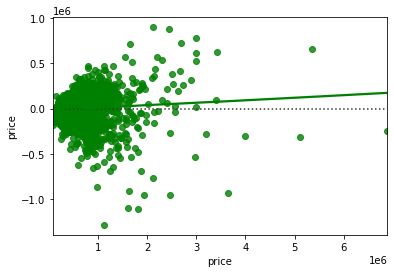

In [102]:
sns.residplot(y_test, residuals, lowess=True, color="g")

In [103]:
top_misses = residuals.abs().sort_values(ascending = False).index[:5]

In [104]:
df_train.loc[top_misses]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,months_since_2010,bdrms_squared,sale_year,years_since_reno,recent_reno,zips_by_price,distance_from_space_needle,zips_by_price_ext,zips_by_price_ext_tidy,zips_by_price_ext_tidy_power,zips_by_liv_qual,mod_zips_by_liv_qual,zips_by_price_exp,grade_cats,x_98002,x_98003,x_98004,x_98005,x_98006,x_98007,x_98008,x_98010,x_98011,x_98014,x_98019,x_98022,x_98023,x_98024,x_98027,x_98028,x_98029,x_98030,x_98031,x_98032,x_98033,x_98034,x_98038,x_98039,x_98040,x_98042,x_98045,x_98052,x_98053,x_98055,x_98056,x_98058,x_98059,x_98065,x_98070,x_98072,x_98074,x_98075,x_98077,x_98092,x_98102,x_98103,x_98105,x_98106,x_98107,x_98108,x_98109,x_98112,x_98115,x_98116,x_98117,x_98118,x_98119,x_98122,x_98125,x_98126,x_98133,x_98136,x_98144,x_98146,x_98148,x_98155,x_98166,x_98168,x_98177,x_98178,x_98188,x_98198,x_98199,waterfront_long
16454,3023069166,1404777600000000000,1135250.0,5,4.00,7234.443001,217333.309524,2.0,0,0,3,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500,0,54.176591,25,2014,22,0,18,244.435361,98058,51,0.288674,48,0.486752,1.428179,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1907593.750
1979,8907500070,1428883200000000000,5350000.0,5,5.00,7910.557281,23830.129086,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,0,63.342916,25,2015,6,0,69,244.569300,2,2,0.803294,1,0.985112,3.920425,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1909687.500
10512,5700004028,1429228800000000000,2450000.0,4,4.25,4250.000000,6552.000000,2.0,0,3,4,10,2870,1380,2008,0,98144,47.5747,-122.283,3640,8841,0,63.474333,16,2015,7,0,51,244.632304,33,33,0.331245,25,0.687289,2.745052,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1910671.875
5166,3760500336,1416960000000000000,2125000.0,4,2.75,3190.000000,19373.311060,2.0,0,4,4,10,3190,0,1982,0,98034,47.6991,-122.235,2750,13496,0,58.809035,16,2014,32,0,37,244.584313,47,47,0.296222,27,0.666977,2.080483,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1909921.875
1816,9412400220,1404950400000000000,1612500.0,4,2.75,5470.000000,18065.092624,2.0,1,4,3,11,3730,1740,1992,0,98118,47.5316,-122.263,3620,15100,0,54.242300,16,2014,22,0,23,244.612316,98118,51,0.288674,44,0.516851,1.576804,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1941047.388


In [105]:
df_features.loc[top_misses]

,sqft_living,grade_cats,grade,sqft_above,zips_by_price_exp,sqft_living15,zips_by_price_ext_tidy_power,zips_by_price,zips_by_price_ext_tidy,bathrooms,mod_zips_by_liv_qual,zips_by_liv_qual,sqft_living^2,sqft_living grade_cats,sqft_living grade,sqft_living sqft_above,sqft_living zips_by_price_exp,sqft_living sqft_living15,sqft_living zips_by_price_ext_tidy_power,sqft_living zips_by_price,sqft_living bathrooms,sqft_living mod_zips_by_liv_qual,sqft_living view,sqft_living sqft_basement,sqft_living bedrooms,sqft_living bdrms_squared,sqft_living lat,sqft_living floors,sqft_living waterfront_long,grade_cats^2,grade_cats grade,grade_cats sqft_above,grade_cats zips_by_price_exp,grade_cats sqft_living15,grade_cats zips_by_price_ext_tidy_power,grade_cats zips_by_price,grade_cats bathrooms,grade_cats mod_zips_by_liv_qual,grade_cats view,grade_cats bedrooms,grade_cats bdrms_squared,grade_cats lat,grade_cats floors,grade_cats waterfront_long,grade^2,grade sqft_above,grade zips_by_price_exp,grade sqft_living15,grade zips_by_price_ext_tidy_power,grade zips_by_price,grade bathrooms,grade mod_zips_by_liv_qual,grade view,grade bedrooms,grade bdrms_squared,grade lat,grade waterfront_long,sqft_above^2,sqft_above zips_by_price_exp,sqft_above sqft_living15,sqft_above zips_by_price_ext_tidy_power,sqft_above zips_by_price,sqft_above bathrooms,sqft_above mod_zips_by_liv_qual,sqft_above view,sqft_above sqft_basement,sqft_above bedrooms,sqft_above bdrms_squared,sqft_above lat,sqft_above floors,sqft_above waterfront_long,zips_by_price_exp^2,zips_by_price_exp sqft_living15,zips_by_price_exp zips_by_price_ext_tidy_power,zips_by_price_exp zips_by_price,zips_by_price_exp bathrooms,zips_by_price_exp mod_zips_by_liv_qual,zips_by_price_exp view,zips_by_price_exp sqft_basement,zips_by_price_exp bedrooms,zips_by_price_exp bdrms_squared,zips_by_price_exp lat,zips_by_price_exp floors,zips_by_price_exp waterfront_long,sqft_living15^2,sqft_living15 zips_by_price_ext_tidy_power,sqft_living15 zips_by_price,sqft_living15 bathrooms,sqft_living15 mod_zips_by_liv_qual,sqft_living15 view,sqft_living15 sqft_basement,sqft_living15 bedrooms,sqft_living15 bdrms_squared,sqft_living15 lat,sqft_living15 floors,sqft_living15 waterfront_long,zips_by_price_ext_tidy_power^2,zips_by_price_ext_tidy_power zips_by_price,zips_by_price_ext_tidy_power zips_by_price_ext_tidy,zips_by_price_ext_tidy_power bathrooms,zips_by_price_ext_tidy_power mod_zips_by_liv_qual,zips_by_price_ext_tidy_power view,zips_by_price_ext_tidy_power sqft_basement,zips_by_price_ext_tidy_power bedrooms,zips_by_price_ext_tidy_power bdrms_squared,zips_by_price_ext_tidy_power lat,zips_by_price_ext_tidy_power floors,zips_by_price_ext_tidy_power waterfront_long,zips_by_price^2,zips_by_price bathrooms,zips_by_price mod_zips_by_liv_qual,zips_by_price view,zips_by_price sqft_basement,zips_by_price bedrooms,zips_by_price bdrms_squared,zips_by_price lat,zips_by_price floors,zips_by_price waterfront_long,zips_by_price_ext_tidy^2,zips_by_price_ext_tidy zips_by_liv_qual,zips_by_price_ext_tidy lat,zips_by_price_ext_tidy waterfront_long,bathrooms^2,bathrooms mod_zips_by_liv_qual,bathrooms view,bathrooms bedrooms,bathrooms lat,bathrooms floors,bathrooms waterfront_long,mod_zips_by_liv_qual^2,mod_zips_by_liv_qual zips_by_liv_qual,mod_zips_by_liv_qual view,mod_zips_by_liv_qual bedrooms,mod_zips_by_liv_qual bdrms_squared,mod_zips_by_liv_qual lat,mod_zips_by_liv_qual floors,mod_zips_by_liv_qual waterfront_long,zips_by_liv_qual^2,zips_by_liv_qual lat,zips_by_liv_qual waterfront_long
16454,7234.443001,13.0,11.0,7320.0,1.428179,3270.0,0.288674,18.0,51.0,4.00,0.486752,48.0,5.233717e+07,94047.759019,79578.873016,5.295612e+07,10332.077441,2.365663e+07,2088.396341,130219.974026,28937.772006,3521.381452,0.000000,0.000000e+00,36172.215007,180861.075036,343254.787423,14468.886003,-1.380038e+10,169.0,143.0,95160.0,18.566323,42510.0,3.752763,234.0,52.00,6.327779,0.0,65.0,325.0,616.8149,26.0,-2.479872e+07,121.0,80520.0,15.709966,35970.0,3.175415,198.0,44